In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## DATOS CATEGORICOS
Los datos categóricos son variables que representan categorías o grupos, en lugar de valores numéricos continuos. Cada valor indica una clase, etiqueta o grupo al que pertenece una observación.

Ejemplos:

Colores: "rojo", "azul", "verde"
Género: "masculino", "femenino"
Estado civil: "soltero", "casado", "divorciado"
En pandas, los datos categóricos se pueden manejar con el tipo category, lo que ahorra memoria y permite operaciones específicas para este tipo de datos. Son útiles para variables cualitativas, análisis estadístico y machine learnin

## CODIFICACION ORDINAL

La codificación ordinal es una técnica para convertir datos categóricos que tienen un orden lógico (por ejemplo, "bajo", "medio", "alto") en valores numéricos que respetan ese orden.

Por ejemplo:

"bajo" → 0
"medio" → 1
"alto" → 2
Esto es útil cuando las categorías representan niveles, rangos o jerarquías. En pandas, puedes usar el tipo CategoricalDtype para definir el orden y luego convertir la columna:

## CODIFICACION ONE - HOT
La codificación One Hot es una técnica para convertir variables categóricas en variables numéricas binarias. Consiste en crear una columna para cada categoría y asignar 1 si la fila pertenece a esa categoría y 0 en caso contrario.

Por ejemplo, para la columna "Color" con valores "rojo", "azul", "verde":

Color	rojo	azul	verde
rojo	1	0	0
azul	0	1	0
verde	0	0	1


In [3]:
data ={
    'Producto': ['Manzana', 'Banana', 'Cereza', 'Manzana', 'Cereza'],
    'Categoria': ['Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta'],
    'Calidad': ['Alta', 'Media', 'Alta', 'Baja', 'Media'],
    'Ventas': [100, 150, 200, 130, 170]
    
}

df = pd.DataFrame(data)
print("DataFrame Original:")
display(df)

DataFrame Original:


,Producto,Categoria,Calidad,Ventas
0,Manzana,Fruta,Alta,100
1,Banana,Fruta,Media,150
2,Cereza,Fruta,Alta,200
3,Manzana,Fruta,Baja,130
4,Cereza,Fruta,Media,170


In [ ]:
# Convertir la columna calidad a tipo categórico codificado ordinal
mapa_calidad = {'Baja': 1, 'Media': 2, 'Alta': 3}
df['Calidad_Codificada'] = df['Calidad'].map(mapa_calidad)
print("\nDataFrame con Columna 'Calidad' Codificada:")
display(df)


DataFrame con Columna 'Calidad' Codificada:


,Producto,Categoria,Calidad,Ventas,Calidad_Codificada
0,Manzana,Fruta,Alta,100,3
1,Banana,Fruta,Media,150,2
2,Cereza,Fruta,Alta,200,3
3,Manzana,Fruta,Baja,130,1
4,Cereza,Fruta,Media,170,2


In [5]:
# Codificacion One-Hot para la columna calidad
df_onehot = pd.get_dummies(df, columns=['Calidad'], prefix='Calidad')
print("\nDataFrame con Codificación One-Hot para 'Calidad':")
display(df_onehot)


DataFrame con Codificación One-Hot para 'Calidad':


,Producto,Categoria,Ventas,Calidad_Codificada,Calidad_Alta,Calidad_Baja,Calidad_Media
0,Manzana,Fruta,100,3,True,False,False
1,Banana,Fruta,150,2,False,False,True
2,Cereza,Fruta,200,3,True,False,False
3,Manzana,Fruta,130,1,False,True,False
4,Cereza,Fruta,170,2,False,False,True


In [7]:
# Visualizar los tipos de datos
print("\nTipos de Datos en el DataFrame Original:")
print(df.dtypes)


Tipos de Datos en el DataFrame Original:
Producto              object
Categoria             object
Calidad               object
Ventas                 int64
Calidad_Codificada     int64
dtype: object


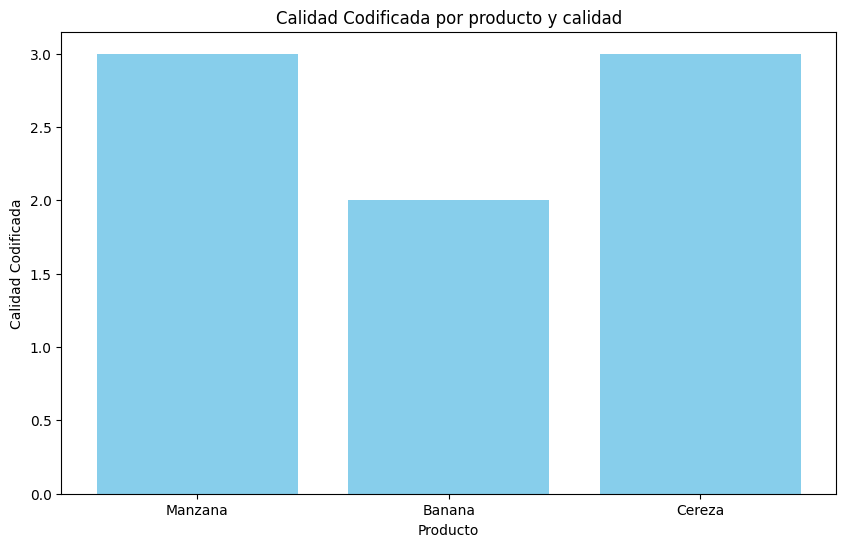

In [9]:
#Grafico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Producto'], df['Calidad_Codificada'], color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Calidad Codificada')
plt.title('Calidad Codificada por producto y calidad')
plt.show()

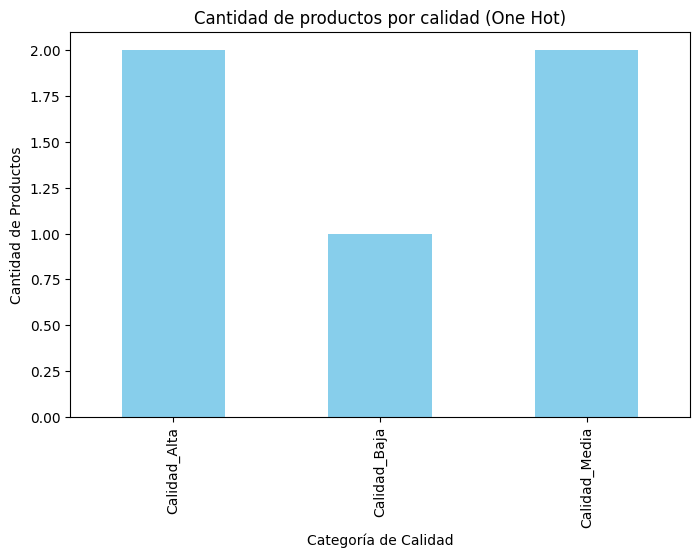

In [12]:
# Seleccionar solo las columnas de calidad
categorias = ['Calidad_Alta', 'Calidad_Baja', 'Calidad_Media']
conteo = df_onehot[categorias].sum()

# Graficar solo las tres categorías de calidad
plt.figure(figsize=(8, 5))
conteo.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría de Calidad')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de productos por calidad (One Hot)')
plt.show()